In [382]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score,precision_score,recall_score, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing


In [383]:
df = pd.read_csv('./clean_data.csv')
#Find top patent producing universities
sorted_df = df.sort_values(by='total_patents',ascending=False)
sorted_df
df.drop(['college_name'],axis=1,inplace=True)
ddf = pd.get_dummies(df['endowment_pc_2000'])
df.drop('endowment_pc_2000',axis=1,inplace=True)
df = pd.concat([df,ddf],axis=1)
df


,total_students,lower_class,lower_middle_class,middle_class,upper-middle_class,upper_class,inventor,lower_class_inventor,lower-middle_class_inventor,middle_class_inventor,...,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000,Community College,Large Endowment,Medium Endowment,Small Endowment
0,27002,3205,4527,5628,6957,6685,0.001037,0.000312,0.000663,0.000533,...,6.716418,23.654982,5.102395,11.714683,17.216244,5.657758,0,0,1,0
1,31081,1205,2257,3697,6042,17880,0.008462,0.003319,0.003544,0.005951,...,1.291597,4.224282,0.000000,25.528034,35.876007,0.000000,0,1,0,0
2,29927,2611,3590,4783,7340,11603,0.002540,0.001532,0.000557,0.002300,...,6.385458,9.298531,1.747844,26.963411,26.171057,0.000000,0,0,0,1
3,22910,2172,3249,4203,5648,7638,0.001877,0.000000,0.002155,0.001903,...,7.668644,19.490221,4.043068,13.469567,24.895628,0.000000,0,1,0,0
4,21615,1695,2900,4443,5754,6823,0.002591,0.002360,0.002069,0.002476,...,12.661638,16.217672,2.397629,23.302801,19.800646,2.101293,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2857,152,228,390,525,1562,0.003850,0.006579,0.000000,0.000000,...,0.000000,12.606837,0.000000,2.884615,34.401711,0.000000,1,0,0,0
309,5040,276,411,552,809,2992,0.004167,0.000000,0.004866,0.003623,...,0.000000,9.485368,0.706357,9.586277,34.611504,0.000000,1,0,0,0
310,2691,273,318,315,428,1357,0.005946,0.000000,0.000000,0.000000,...,0.000000,25.164835,6.483517,3.516484,0.000000,0.000000,1,0,0,0
311,640,60,67,130,170,213,0.020313,0.000000,0.000000,0.007692,...,0.000000,0.000000,0.000000,3.409091,0.000000,0.000000,1,0,0,0


In [384]:
#Normalization function
def normalize(x):
     for column in x.columns:
         if x[column].dtype != bool:
            if x[column].abs().max() != 0:
                x[column] = (x[column] - np.mean(x[column]))/np.std(x[column])


In [385]:
#First Lasso
X = df.drop(['total_patents'],axis=1)
normalize(X)
y = df['total_patents']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=17)
model = Lasso(random_state=17)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(r2_score(y_test,predictions))
selected_features = [feature for feature, coef in zip(X.columns, model.coef_) if coef != 0]
feat_df = pd.DataFrame(selected_features)
feat_df
#feat_df
#feat_df.to_csv('feat_table.csv')
#print(len(feat_df))

0.692730705290872


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+03, tolerance: 1.035e+03
  model = cd_fast.enet_coordinate_descent(


,0
0,lower_class
1,upper-middle_class
2,upper_class
3,inventor
4,lower_class_inventor
5,lower-middle_class_inventor
6,middle_class_inventor
7,upper_class_inventor
8,top5citedinventors
9,total_cites


/var/folders/36/j7ky89tj7hlb6vw40hsl12xh0000gn/T/ipykernel_63561/3674514339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['inventor','middle_class_inventor','top5citedinventors','total_cites','lower_class_inventor','lower-middle_class_inventor','upper_class_inventor'],axis=1,inplace=True)
/var/folders/36/j7ky89tj7hlb6vw40hsl12xh0000gn/T/ipykernel_63561/1532521460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = (x[column] - np.mean(x[column]))/np.std(x[column])


Accuracy: 0.7380952380952381
Recall: 0.8428571428571429
Precision: 0.7283950617283951
ROC Score: 0.7250000000000001


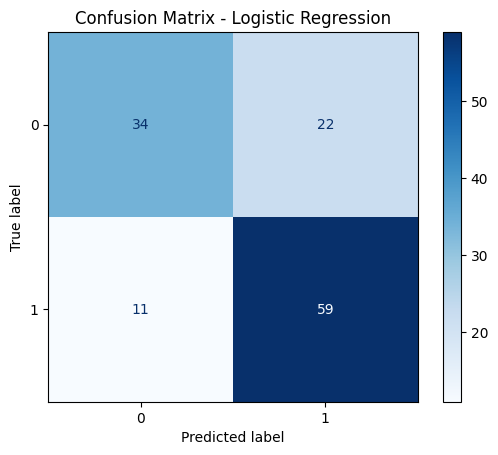

Accuracy     0.738095
Recall       0.842857
Precision    0.728395
ROC          0.725000
dtype: float64

In [386]:
#Logistic Regression
df['total_patents'] = np.log1p(df['total_patents'])
df['total_patents'].value_counts()
target_classes = pd.cut(df['total_patents'], bins=2, labels=False, include_lowest=True)
df['total_patents'] = target_classes
X = df[selected_features]
X.drop(['inventor','middle_class_inventor','top5citedinventors','total_cites','lower_class_inventor','lower-middle_class_inventor','upper_class_inventor'],axis=1,inplace=True)
#X.drop('total_patents',axis=1,inplace=True)
normalize(X)
y = df['total_patents']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=17)
model = LogisticRegression(random_state=17)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))
print('Precision:',precision_score(y_test,predictions))
print('ROC Score:',roc_auc_score(y_test,predictions))
scoring_csv = {'Accuracy':accuracy_score(y_test,predictions),'Recall':recall_score(y_test,predictions),'Precision':precision_score(y_test,predictions),'ROC':roc_auc_score(y_test,predictions)}
#pd.crosstab(y_test,predictions)
#coef.to_csv('features_coefficients.csv')
cm_lr= confusion_matrix(y_test, predictions)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
scoring_csv = pd.Series(scoring_csv)
scoring_csv
#scoring_csv.to_csv('scoring_lr.csv')

In [387]:
coef = pd.DataFrame({'Feature' : X.columns,'Coefficient': (model.coef_[0])}).sort_values(by='Coefficient',ascending=False)
coef

,Feature,Coefficient
39,exp_instr_2000,1.214288
2,upper_class,0.919361
8,mr_ktop1_pq1,0.831984
46,pct_stem_2000,0.758534
40,asian_or_pacific_share_fall_2000,0.732774
0,lower_class,0.694513
3,tier,0.659359
10,k_mean,0.572695
43,pct_arthuman_2000,0.572135
27,k_married_cond_parq4,0.565445


/var/folders/36/j7ky89tj7hlb6vw40hsl12xh0000gn/T/ipykernel_63561/3845121162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['inventor','middle_class_inventor','top5citedinventors','total_cites','lower_class_inventor','lower-middle_class_inventor','upper_class_inventor'],axis=1,inplace=True)
/var/folders/36/j7ky89tj7hlb6vw40hsl12xh0000gn/T/ipykernel_63561/1532521460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = (x[column] - np.mean(x[column]))/np.std(x[column])


Accuracy: 0.7857142857142857
Recall: 0.8142857142857143
Precision: 0.8028169014084507


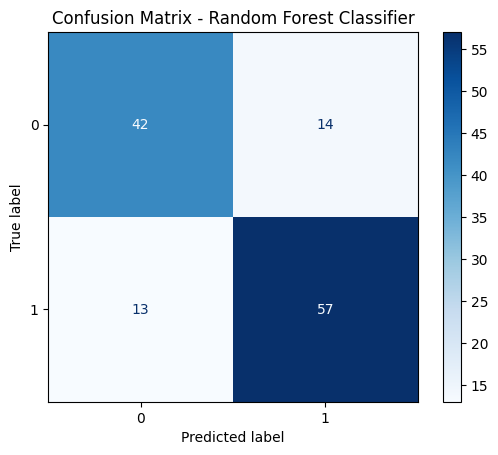

In [388]:
#Random Forest
model = RandomForestClassifier(random_state=17)
df['total_patents'] = np.log1p(df['total_patents'])
df['total_patents'].value_counts()
target_classes = pd.cut(df['total_patents'], bins=2, labels=False, include_lowest=True)
df['total_patents'] = target_classes
X = df[selected_features]
X.drop(['inventor','middle_class_inventor','top5citedinventors','total_cites','lower_class_inventor','lower-middle_class_inventor','upper_class_inventor'],axis=1,inplace=True)
#X.drop('total_patents',axis=1,inplace=True)
normalize(X)
y = df['total_patents']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=17)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))
print('Precision:',precision_score(y_test,predictions))
scoring_csv = {'Accuracy':accuracy_score(y_test,predictions),'Recall':recall_score(y_test,predictions),'Precision':precision_score(y_test,predictions),'ROC':roc_auc_score(y_test,predictions)}
cm_rf = confusion_matrix(y_test, predictions)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
scoring_csv = pd.Series(scoring_csv)

scoring_csv.to_csv('scoring_rf.csv')


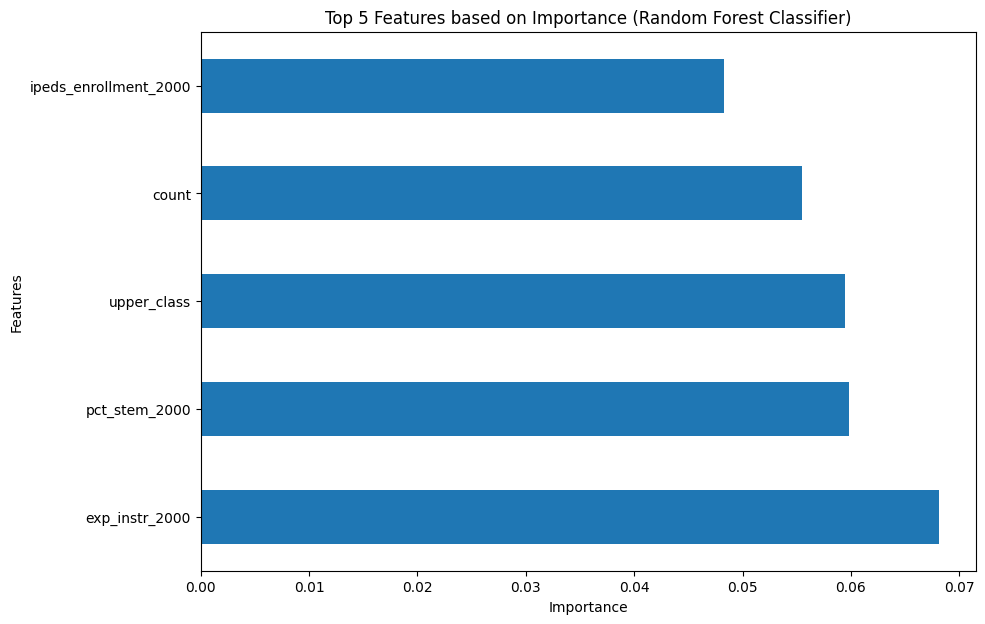

In [389]:
#Random Forest Feature Importances
plt.figure(figsize=(10, 7))
varimp=pd.DataFrame(model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance')
# Plot the top 7 features based on importance
varimp.importance.nlargest(5).plot(kind='barh')

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 5 Features based on Importance (Random Forest Classifier)')

# Show the plot
plt.show()

/var/folders/36/j7ky89tj7hlb6vw40hsl12xh0000gn/T/ipykernel_63561/776144475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['inventor','middle_class_inventor','top5citedinventors','total_cites','lower_class_inventor','lower-middle_class_inventor','upper_class_inventor'],axis=1,inplace=True)
/var/folders/36/j7ky89tj7hlb6vw40hsl12xh0000gn/T/ipykernel_63561/1532521460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = (x[column] - np.mean(x[column]))/np.std(x[column])


Accuracy: 0.7619047619047619
Recall: 0.8285714285714286
Precision: 0.7631578947368421


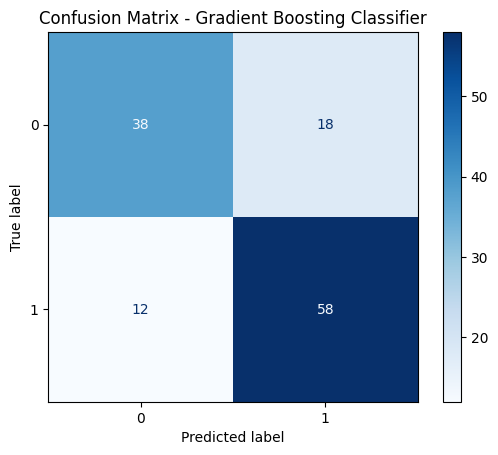

In [403]:
#Gradient Boost Classifier
model = GradientBoostingClassifier()
df['total_patents'] = np.log1p(df['total_patents'])
df['total_patents'].value_counts()
target_classes = pd.cut(df['total_patents'], bins=2, labels=False, include_lowest=True)
df['total_patents'] = target_classes
X = df[selected_features]
X.drop(['inventor','middle_class_inventor','top5citedinventors','total_cites','lower_class_inventor','lower-middle_class_inventor','upper_class_inventor'],axis=1,inplace=True)
normalize(X)
y = df['total_patents']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=17)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))
print('Precision:',precision_score(y_test,predictions))
cm_boost = confusion_matrix(y_test, predictions)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_boost, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


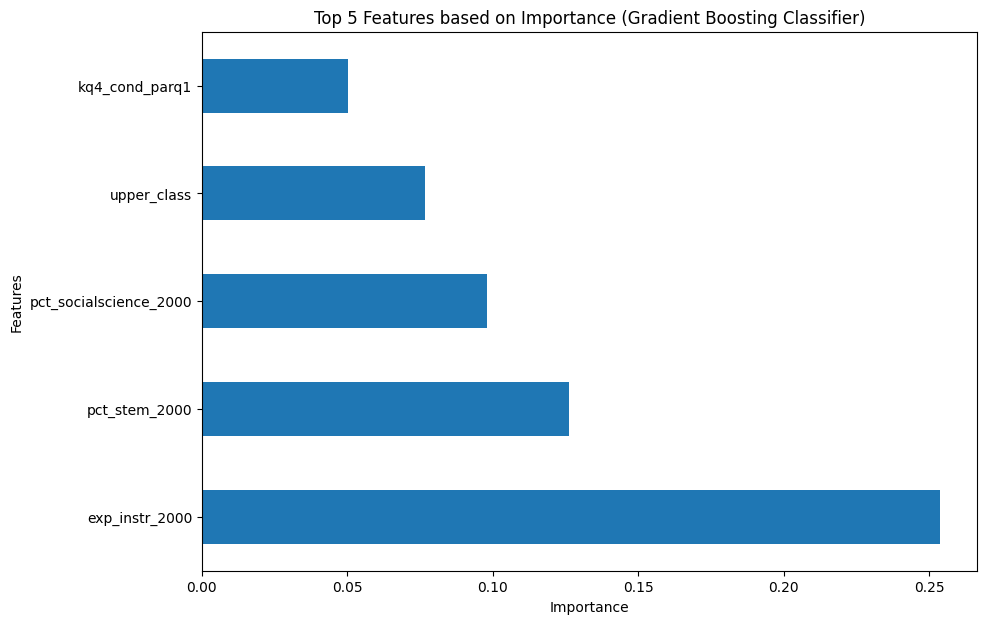

In [391]:
#Gradient Boosting Classifier Feature Importances
plt.figure(figsize=(10, 7))
varimp=pd.DataFrame(model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance')
# Plot the top 7 features based on importance
varimp.importance.nlargest(5).plot(kind='barh')

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 5 Features based on Importance (Gradient Boosting Classifier)')

# Show the plot
plt.show()


In [392]:
model = GradientBoostingClassifier(learning_rate= 0.2, max_depth=3, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 50)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))
print('Precision:',precision_score(y_test,predictions))

Accuracy: 0.7380952380952381
Recall: 0.8
Precision: 0.7466666666666667
